In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['training.csv', 'sample_submission.csv', 'test.csv']


In [2]:
#loading the train data
train_data = pd.read_csv('../input/training.csv')
print("The train data")
print(train_data.head())

#loading the test data
test_data = pd.read_csv('../input/test.csv')
print("The test data")
print(test_data.head())


The train data
     ID  Q1             ...               insurance  mobile_money_classification
0  5086  98             ...                       0                            0
1  1258  40             ...                       0                            3
2   331  18             ...                       0                            2
3  6729  50             ...                       0                            3
4  8671  34             ...                       1                            3

[5 rows x 37 columns]
The test data
     ID  Q1  Q2  Q3  Q4  Q5    ...      Q16  Q17  Q18  Q19  Latitude  Longitude
0  2352  30   2   1   3   6    ...        5   -1    1    4 -2.596421  32.913584
1  8208  53   1   1   3   1    ...        1   -1    1    4 -1.778303  34.062640
2  2785  23   2   1   3   5    ...        1   -1    1    1 -1.851789  31.536866
3  2967  30   2   3   3   4    ...        1   -1    1    4 -1.235656  34.229012
4  1697  28   2   1   5   4    ...        4    3    1    2 -7.

The data is already preprocessed so we'll not carry out data preprocessing...

**Checking if the data has any missing values**

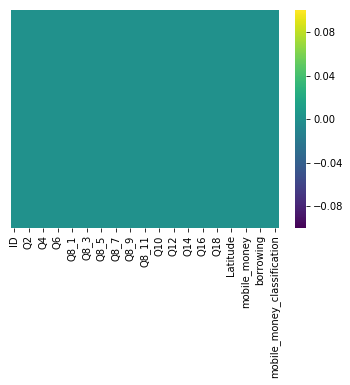

In [3]:
# check if the data has missing points with seaborn heatmap
import seaborn as sns
sns.heatmap(train_data.isnull(),yticklabels=False, cmap='viridis')

The data has no missing values.

**Printing the list of unique classes**

In [4]:
# view the columns
train_data.columns

Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Latitude', 'Longitude', 'mobile_money', 'savings', 'borrowing',
       'insurance', 'mobile_money_classification'],
      dtype='object')

In [5]:
cols = ['ID','mobile_money', 'savings', 'borrowing','insurance']
train_data = train_data.drop(cols, axis=1)

In [6]:
# the classes 
train_data['mobile_money_classification'].unique()

array([0, 3, 2, 1])

There are 4 classes:
* 0 - no mobile money and no other financial service (saving, borrowing, insurance)
* 1 - no mobile money, but at least one other financial service
* 2 - mobile money only
* 3 - mobile money and at least one other financial service

In [7]:
# checking the shape of the train data
train_data.shape

(7094, 32)

**Training the Model**

In [8]:
X = train_data.drop(['mobile_money_classification'], axis=1)
y = train_data['mobile_money_classification']

from sklearn.model_selection import train_test_split


#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)




In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
 #Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [10]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [11]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(X_train,y_train)

In [12]:
#rf_random.best_params_

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=800, max_depth=10, min_samples_split=2, 
                             min_samples_leaf=4,max_features='sqrt', bootstrap=True,random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

**PREDICTING**

In [14]:
# viewing the shape of the test data
print("Shape of the test data:", test_data.shape)



Shape of the test data: (2365, 32)


In [15]:

print("Columns in the test data:", test_data.columns)


Columns in the test data: Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Latitude', 'Longitude'],
      dtype='object')


The test data has 4 less columns besides the target variable.

In [16]:
from sklearn.preprocessing import LabelEncoder

labels = LabelEncoder()
y_train_labels_fit = labels.fit(y_train)
y_train_lables_trf = labels.transform(y_train)

x_test = test_data.drop(['ID'], axis=1)
test_pred = rfc.predict_proba(x_test)


In [17]:
test_pred = pd.DataFrame(rfc.predict_proba(x_test)*1, columns=labels.classes_)
q = {'ID': test_data["ID"], 'no_financial_services': test_pred[0], 'other_only': test_pred[1],
    'mm_only': test_pred[2], 'mm_plus': test_pred[3]}
df_pred = pd.DataFrame(data=q)
df_pred = df_pred[['ID','no_financial_services', 'other_only', 'mm_only', 'mm_plus'  ]]

In [18]:
df_pred.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.000872,0.002353,0.170853,0.825923
1,8208,0.018180,0.027926,0.171298,0.782596
2,2785,0.002511,0.012472,0.166653,0.818364
3,2967,0.340913,0.555738,0.024779,0.078570
4,1697,0.001917,0.003736,0.087798,0.906549


In [19]:
df_pred.to_csv('pred_set8.csv', index=False) #save to csv file
